In [1]:
# 📚 MLP Neural Network for Predicting Calls Count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
# =============================
# Load and prepare the data
# =============================

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/מדעי המחשב/שנה ג/סמסטר ב/האקתון דאטה/hackathon-predictive-models-RUPPIN/data/ready_for_models_final.csv')
print(f"✅ Data loaded successfully! Shape: {data.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully! Shape: (98095, 204)


In [11]:
# =============================
# Aggregate and engineer features
# =============================

group_keys = []
group_keys += [col for col in data.columns if col.startswith('שנה_')]
group_keys += [col for col in data.columns if col.startswith('חודש_')]
group_keys += [col for col in data.columns if col.startswith('יום_')]
group_keys += [col for col in data.columns if col.startswith('נושא_')]
group_keys += ['חג', 'Rain']

agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')

# Sort and create momentum features
agg_daily_topic = agg_daily_topic.sort_values(by=group_keys)
agg_daily_topic['calls_last_3'] = agg_daily_topic['calls_count'].rolling(window=3, min_periods=1).mean().shift(1)
agg_daily_topic['calls_last_7'] = agg_daily_topic['calls_count'].rolling(window=7, min_periods=1).mean().shift(1)
agg_daily_topic[['calls_last_3', 'calls_last_7']] = agg_daily_topic[['calls_last_3', 'calls_last_7']].fillna(0)

print("✅ Aggregated and added momentum features.")

# Prepare features and target
X = agg_daily_topic.drop(columns=['calls_count'])
y = agg_daily_topic['calls_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")


✅ Aggregated and added momentum features.
✅ Features shape: (21843, 114)
✅ Target shape: (21843,)


<ipython-input-11-33ad5f74a40e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
<ipython-input-11-33ad5f74a40e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
<ipython-input-11-33ad5f74a40e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [12]:
# =============================
# Build MLP Model
# =============================

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("✅ MLP model compiled.")


✅ MLP model compiled.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# =============================
# Train the Model
# =============================

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 32.3375 - mae: 3.2854 - val_loss: 14.6319 - val_mae: 2.1076
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.2238 - mae: 2.1275 - val_loss: 12.6711 - val_mae: 1.7893
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.9920 - mae: 1.9041 - val_loss: 11.8986 - val_mae: 1.7393
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.0395 - mae: 1.8554 - val_loss: 11.6800 - val_mae: 1.7015
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9033 - mae: 1.7830 - val_loss: 11.2813 - val_mae: 1.6924
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10.4568 - mae: 1.8188 - val_loss: 11.6935 - val_mae: 1.7023
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.8306 - mae: 1.7580 - val_loss: 11.0388 - val_mae: 1.6721
Epoch 8/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.9949 - mae: 1.7357 - val_loss: 10.5298 - val_mae: 1.6586
Epoch 9/100
547/547 ━━━━━━━━━━━━━━━

In [14]:
# =============================
# Evaluate the Model
# =============================

# Predict
y_pred_mlp = model.predict(X_test).flatten()

# Metrics
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print("=== MLP Results ===")
print(f"MAE: {mae_mlp:.2f}")
print(f"RMSE: {rmse_mlp:.2f}")
print(f"R2 Score: {r2_mlp:.2f}")

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== MLP Results ===
MAE: 1.67
RMSE: 3.23
R2 Score: 0.74


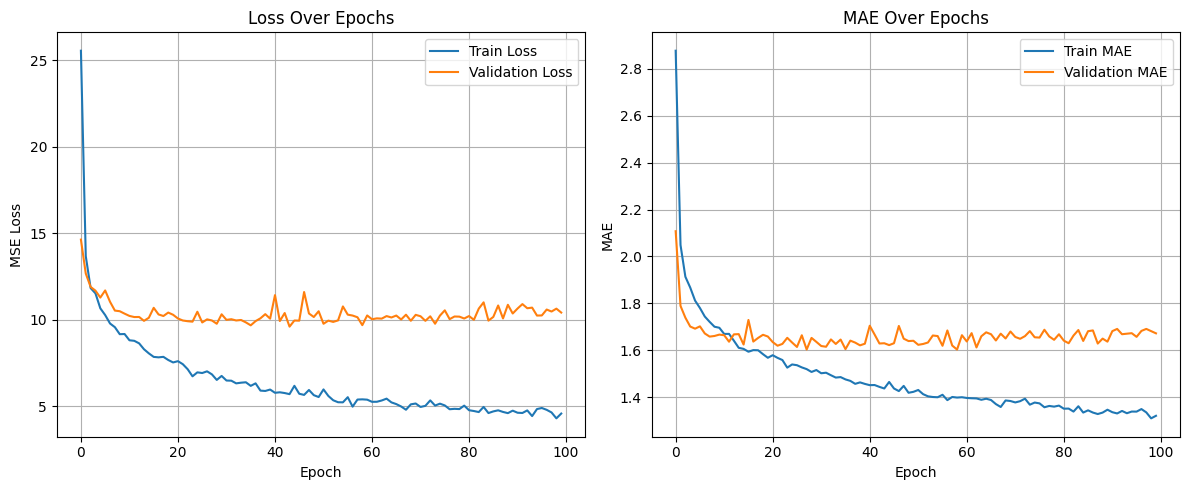

In [15]:
# =============================
# Plot training history
# =============================

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# MAE plot
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
